## Car Brand Logo Image Classification

Dataset Link -- https://www.kaggle.com/datasets/volkandl/car-brand-logos

In [13]:
import os
import glob
import shutil
import itertools
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
import tensorflow as tf
# from tensorflow.keras import layersimage
# from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
# from keras import applications
# from keras import optimizers
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
# from keras import backend as K
from keras.layers import Conv2D, MaxPool2D,Dense,Activation,Dropout,Flatten,BatchNormalization,GlobalAvgPool2D
from tensorflow.keras.applications import ResNet50, VGG19, MobileNet, InceptionV3, EfficientNetB6
from sklearn.metrics import confusion_matrix
# import image processing library
from skimage.io import imread, imshow
from skimage.transform import resize
#from skimage.color import rgb2grey
from skimage.feature import local_binary_pattern


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# !pip install pillow==4.0.0

In [ ]:
# !pip install opencv-python

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the data**

In [15]:
# Read the data folders paths
train_path = "/content/drive/MyDrive/Deep Learning CNN Project/Final Submission/Car_Brand_Logos/Train"
test_path = "/content/drive/MyDrive/Deep Learning CNN Project/Final Submission/Car_Brand_Logos/Test"

**List class Names**

In [17]:
class_names = os. listdir(train_path)
class_names

['lexus',
 'hyundai',
 'mazda',
 'volkswagen',
 'skoda',
 'mercedes',
 'opel',
 'toyota']

**Visualizing an image from each class**

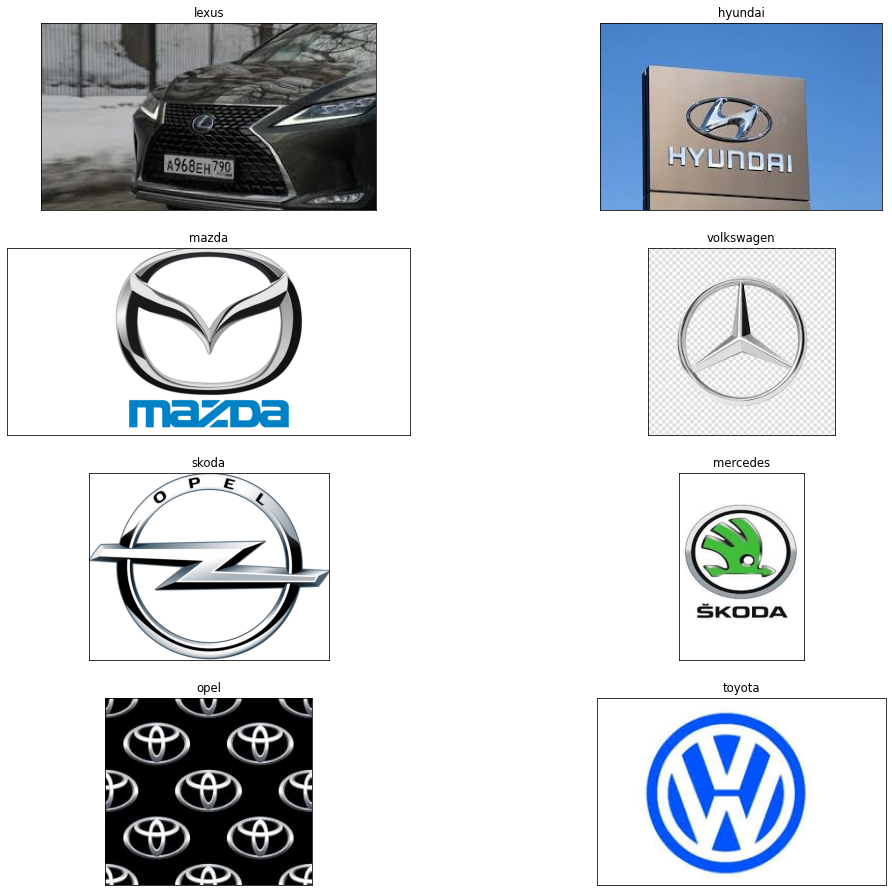

In [34]:
hyundai_logo = cv2.imread(train_path + "/hyundai/images140.jpg")
hyundai_logo = cv2.cvtColor(hyundai_logo, cv2.COLOR_BGR2RGB)
lexus_logo  = cv2.imread(train_path + "/lexus/images104.jpg")
lexus_logo = cv2.cvtColor(lexus_logo, cv2.COLOR_BGR2RGB)
mazda_logo = cv2.imread(train_path + "/mazda/0001.jpg")
mazda_logo = cv2.cvtColor(mazda_logo, cv2.COLOR_BGR2RGB)
mercedes_logo = cv2.imread(train_path + "/mercedes/images13.jpg")
mercedes_logo = cv2.cvtColor(mercedes_logo, cv2.COLOR_BGR2RGB)
opel_logo = cv2.imread(train_path + "/opel/00000aaa1.jpg")
opel_logo= cv2.cvtColor(opel_logo, cv2.COLOR_BGR2RGB)
skoda_logo = cv2.imread(train_path + "/skoda/images156.jpg")
skoda_logo= cv2.cvtColor(skoda_logo, cv2.COLOR_BGR2RGB)
toyota_logo = cv2.imread(train_path + "/toyota/images155.jpg")
toyota_logo= cv2.cvtColor(toyota_logo, cv2.COLOR_BGR2RGB)
volkswagen_logo = cv2.imread(train_path + "/volkswagen/images137.jpg")
volkswagen_logo = cv2.cvtColor(volkswagen_logo, cv2.COLOR_BGR2RGB)


# titles = ["lexus", "hyundai","mazda","mercedes","opel","skoda","toyota","volkswagen"]
images = [lexus_logo, hyundai_logo, mazda_logo,    mercedes_logo,     opel_logo,  skoda_logo,   toyota_logo,  volkswagen_logo ]

figure(figsize=(18,16), dpi=70)
for i in range(8):
    plt.subplot(4,2,i+1),plt.imshow(images[i])
    plt.title(class_names[i])
    plt.xticks([]),plt.yticks([])
plt.show()

**Count of number of images for Train folder**

In [ ]:
import os
import collections

# Set the path of the folder
folder_path = train_path

# Create a defaultdict to store the image counts
image_counts = collections.defaultdict(int)

# Loop through the subdirectories within the folder
for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    if os.path.isdir(subdir_path):
        # Loop through the files within the subdirectory
        for filename in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, filename)
            # Check if the file is an image
            if os.path.isfile(file_path) and file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                # Increment the image count for the subdirectory
                image_counts[subdir] += 1

# Print the image counts for each subdirectory
for subdir, count in image_counts.items():
    print(f"{subdir}: {count} images")


lexus: 301 images
hyundai: 302 images
mazda: 317 images
volkswagen: 330 images
skoda: 314 images
mercedes: 342 images
opel: 301 images
toyota: 306 images


**Count Number of Images for Test Folder**

In [ ]:
import os
import collections

# Set the path of the folder
folder_path = test_path

# Create a defaultdict to store the image counts
image_counts = collections.defaultdict(int)

# Loop through the subdirectories within the folder
for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    if os.path.isdir(subdir_path):
        # Loop through the files within the subdirectory
        for filename in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, filename)
            # Check if the file is an image
            if os.path.isfile(file_path) and file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                # Increment the image count for the subdirectory
                image_counts[subdir] += 1

# Print the image counts for each subdirectory
for subdir, count in image_counts.items():
    print(f"{subdir}: {count} images")

volkswagen: 50 images
toyota: 50 images
skoda: 50 images
opel: 50 images
mercedes: 50 images
lexus: 50 images
hyundai: 50 images
mazda: 53 images


**Plotting 3 sample images from each Train Folder**

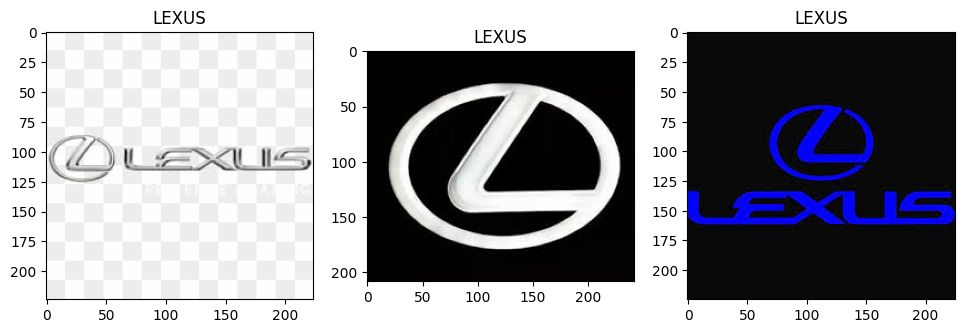

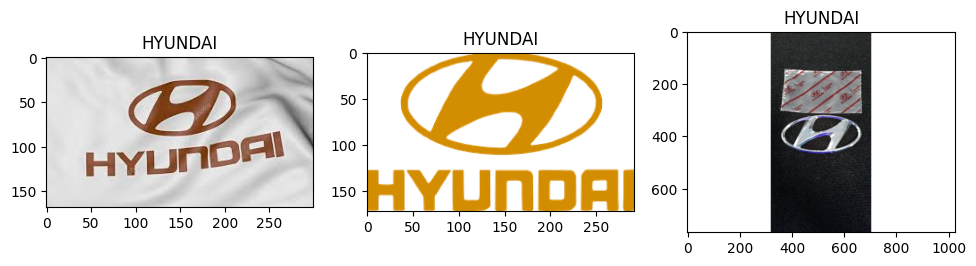

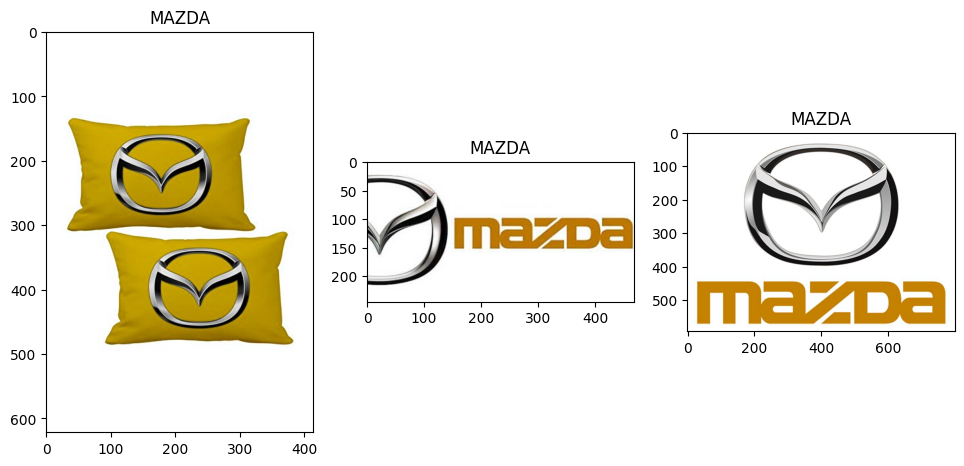

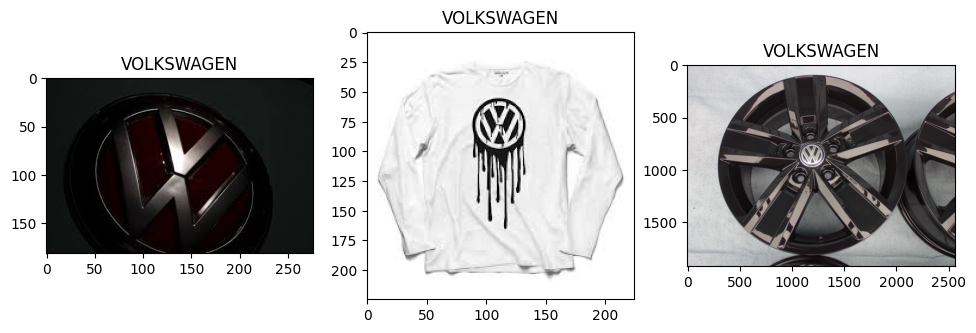

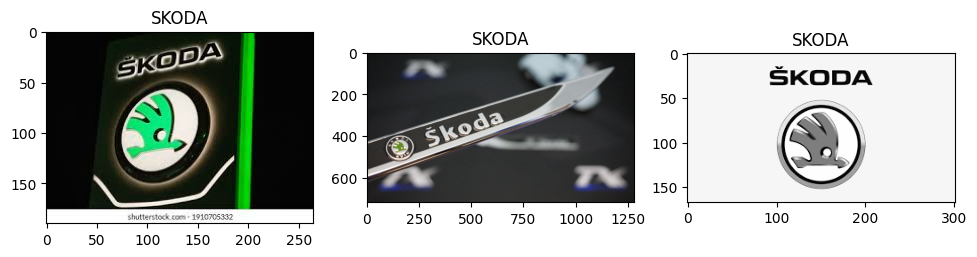

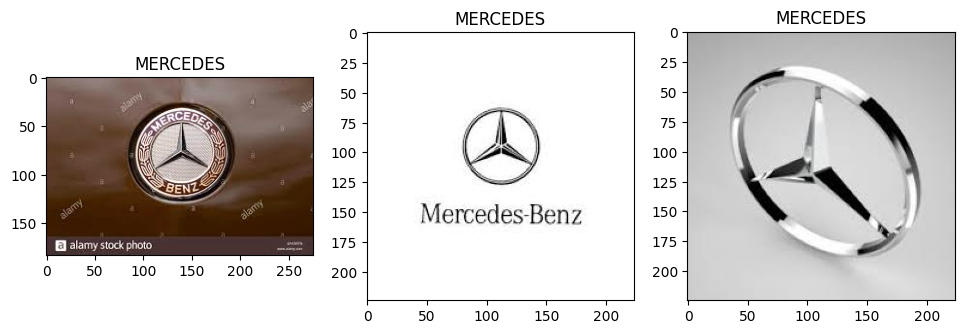

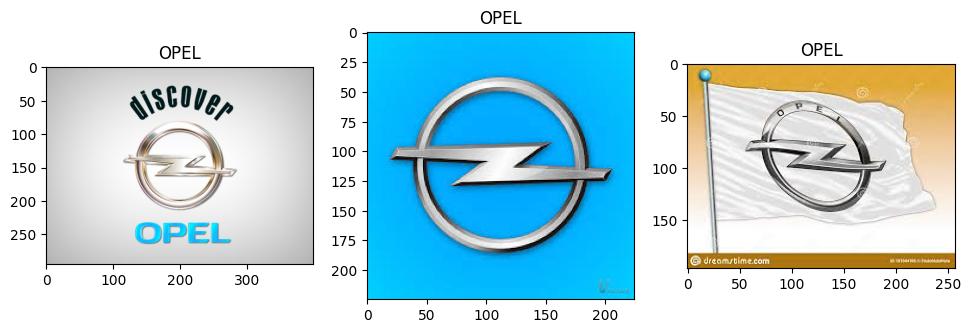

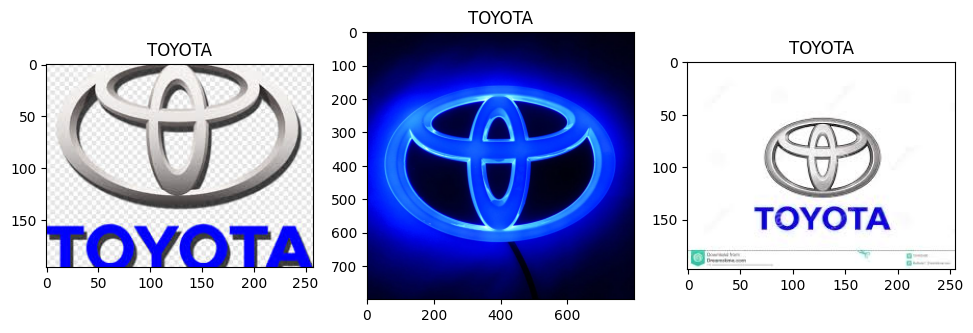

In [ ]:
import random

def ImageSize (train_path , folder_name):
    plt.figure(figsize=(20,20))
    train_image = train_path + '/' + folder_name

    for i in range(3):
        file = random.choice(os.listdir(train_image))
        image_path= os.path.join(train_image, file)
        img=cv2.imread(image_path)
        ax=plt.subplot(1,5,i+1)
        ax.title.set_text(file)
        plt.title(folder_name.upper())
        plt.imshow(img)
        

        
for j in range (len(class_names)):
    ImageSize (train_path, class_names[j])

**Calculate the average height and width for all images**

In [ ]:
#Averaging function
def Average(lst):
    return sum(lst) / len(lst)


listdir = os.listdir(train_path)
ratios_sub = []
ratios = []

for imdir in listdir:
    imlist = os.listdir(os.path.join(train_path, imdir))  
    for im in imlist:
        im = cv2.imread(os.path.join(train_path,imdir,im))
        ratio = (im.shape[0] / im.shape[1]) #height/width ratio
        ratios_sub.append((ratio))
    ratios_sub_ave=Average(ratios_sub)
    ratios.append((ratios_sub_ave))    
ratio_ave = Average(ratios)
print("Average ratio of width to height is {}".format(ratio_ave))

Average ratio of width to height is 0.8068450360016081


In [ ]:
tot_height = 0
tot_width = 0
for imdir in listdir:
    imlist = os.listdir(os.path.join(train_path, imdir))  
    for im in imlist:
        im = cv2.imread(os.path.join(train_path,imdir,im))
        tot_height = tot_height + im.shape[0]
        tot_width = tot_width + im.shape[1]
#         ratio = (im.shape[0] / im.shape[1]) #height/width ratio
#         ratios_sub.append((ratio))
#     ratios_sub_ave=Average(ratios_sub)
#     ratios.append((ratios_sub_ave))    
ratio_ave2 = tot_height / tot_width
print("Average ratio of width to height BY ANOTHER METHOD is {}".format(ratio_ave))

Average ratio of width to height BY ANOTHER METHOD is 0.8068450360016081


**Define average height and width values**

In [ ]:
width = 240
height= int(width*ratio_ave)
input_shape = ( height,width)
print(input_shape)

(193, 240)


In [ ]:
img_width, img_height = width,height 

## **Using Data Augmentation**

In [ ]:
# img_width = 240
# img_height = 196
batch = 32


# Create a data generator
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10,
							 horizontal_flip=True)



# Create data augmentor
train_datagen = train_datagen.flow_from_directory(train_path,
												target_size=(img_height, img_width),
												class_mode="sparse",
                        batch_size=batch)


Found 2513 images belonging to 8 classes.


In [ ]:

# Create data generator

test_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10,
							 horizontal_flip=True)

# Create data augmentor

test_datagen = test_datagen.flow_from_directory(test_path,
												target_size=(img_height, img_width),
												class_mode="sparse",
                        batch_size=batch)


Found 403 images belonging to 8 classes.


In [ ]:
class_names = list(train_datagen.class_indices.keys())
class_names

['hyundai',
 'lexus',
 'mazda',
 'mercedes',
 'opel',
 'skoda',
 'toyota',
 'volkswagen']

## CNN Model 1

In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# modelling starts using a CNN.
model = Sequential()

sz = 128

# create CNN model

model = Sequential()


# First convolution layer and pooling
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.40))

#Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=8, activation='softmax')) # softmax for more than 2

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 193, 240, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 193, 240, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 120, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 120, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 60, 32)       0         
 2D)                                                             
                                                      

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_datagen,
    validation_data=test_datagen,
    epochs=10
)

Epoch 1/10
79/79 [==============================] - 65s 754ms/step - loss: 2.0682 - accuracy: 0.1635 - val_loss: 2.0727 - val_accuracy: 0.1787
Epoch 2/10
79/79 [==============================] - 59s 747ms/step - loss: 1.9902 - accuracy: 0.2125 - val_loss: 2.0616 - val_accuracy: 0.1861
Epoch 3/10
79/79 [==============================] - 61s 769ms/step - loss: 1.8939 - accuracy: 0.2567 - val_loss: 2.0112 - val_accuracy: 0.2258
Epoch 4/10
79/79 [==============================] - 58s 746ms/step - loss: 1.9331 - accuracy: 0.2579 - val_loss: 1.9813 - val_accuracy: 0.3102
Epoch 5/10
79/79 [==============================] - 59s 743ms/step - loss: 1.7977 - accuracy: 0.3359 - val_loss: 1.8636 - val_accuracy: 0.3077
Epoch 6/10
79/79 [==============================] - 60s 765ms/step - loss: 1.6374 - accuracy: 0.4023 - val_loss: 1.7349 - val_accuracy: 0.3945
Epoch 7/10
79/79 [==============================] - 59s 745ms/step - loss: 1.5196 - accuracy: 0.4676 - val_loss: 1.6596 - val_accuracy: 0.4293

**Model Evaluation for CNN Model 1**

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


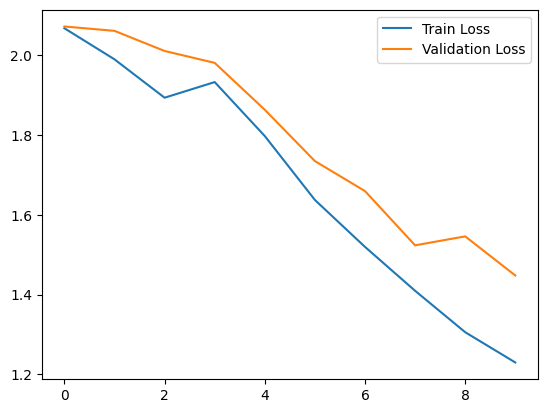

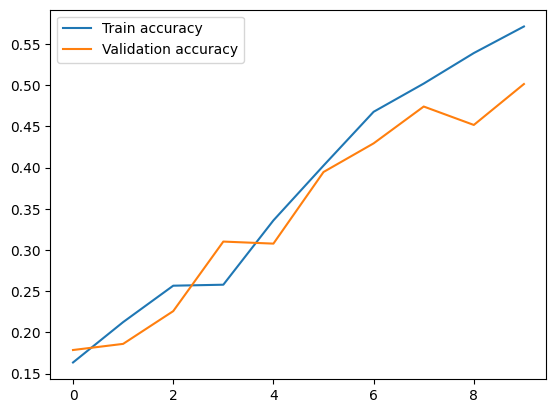

In [ ]:
plt.plot(history.history["loss"], label ="Train Loss")
plt.plot(history.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(history.history["accuracy"], label ="Train accuracy")
plt.plot(history.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(test_datagen)

13/13 [==============================] - 9s 714ms/step - loss: 1.3989 - accuracy: 0.5434


**Train Accuracy and Test Accuracy for CNN Model 1**

In [ ]:
print('Test loss:', scores[0]) 
print('Test accuracy:', scores[1])

Test loss: 1.3989437818527222
Test accuracy: 0.5434243083000183


In [ ]:
len(history.history['loss'])

10

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.068218469619751,
 1.9902009963989258,
 1.893899917602539,
 1.9331492185592651,
 1.7976889610290527]

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    print(predictions[0])

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 26ms/step
[0.09886456 0.23632967 0.0383247  0.12738536 0.0615541  0.21460393
 0.07660952 0.14632815]
1/1 [==============================] - 0s 19ms/step
[0.22620864 0.21116546 0.22325821 0.0812732  0.09521718 0.08086627
 0.04464233 0.0373687 ]
1/1 [==============================] - 0s 19ms/step
[0.13282865 0.18220265 0.10478105 0.21970013 0.06304403 0.06177602
 0.13897076 0.0966967 ]
1/1 [==============================] - 0s 20ms/step
[0.43770355 0.12161452 0.07316036 0.06998463 0.0478667  0.050552
 0.06943596 0.1296823 ]
1/1 [==============================] - 0s 24ms/step
[0.16089919 0.14620146 0.05831614 0.14473239 0.18550125 0.12192646
 0.06772672 0.11469635]
1/1 [==============================] - 0s 19ms/step
[0.18112914 0.15441051 0.05410013 0.13210033 0.3182608  0.05572873
 0.0554578  0.04881257]
1/1 [==============================] - 0s 19ms/step
[9.5943272e-01 9.8997895e-03 2.1402955e-03 1.1346436e-03 3.1099718e-03
 6.4880174e-04 2.1323

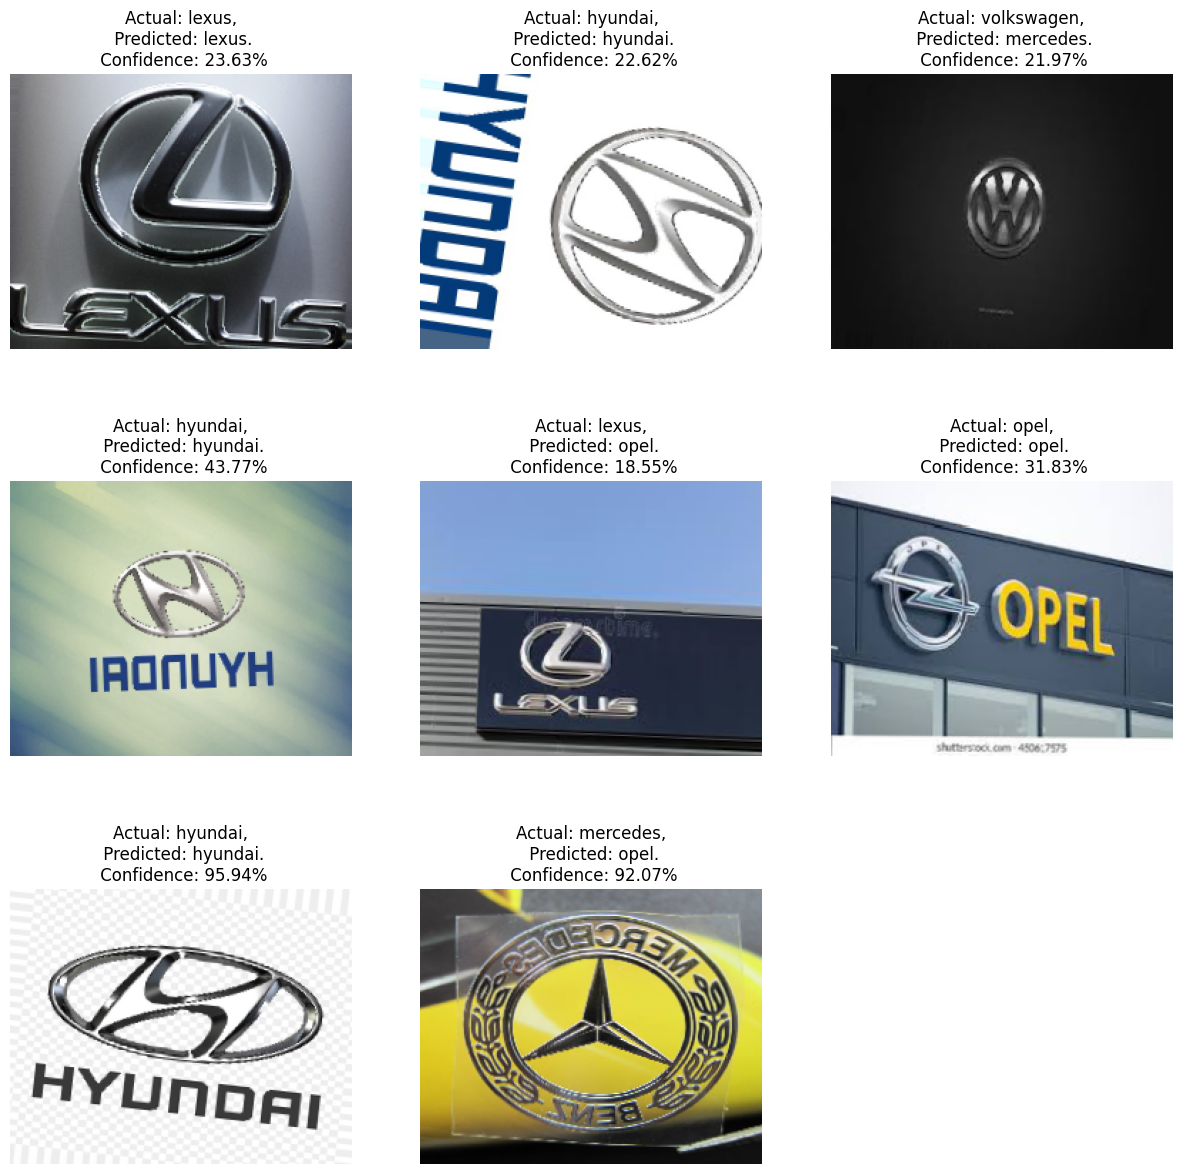

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_datagen:
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

## CNN Model 2

In [ ]:
# Initializing the CNN
model_new = Sequential()

# First convolution layer and pooling
model_new.add(Conv2D(32, (5, 5), input_shape=(img_height, img_width, 3), activation='relu', padding = 'SAME'))
model_new.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model_new.add(Conv2D(32, (3, 3), activation='relu', padding = 'SAME'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model_new.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flattening the layers
model_new.add(Flatten())

# Adding a fully connected layer
model_new.add(Dense(units=96, activation='relu'))
model_new.add(Dropout(0.40))
model_new.add(Dense(units=32, activation='relu'))
# model_new.add(Dropout(0.40))
model_new.add(Dense(units=8, activation='softmax')) # softmax for more than 2


model_new.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 193, 240, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 96, 120, 32)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 120, 32)       9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 60, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 92160)             0         
                                                                 
 dense_6 (Dense)             (None, 96)               

In [ ]:
model_new.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history_new = model_new.fit(
    train_datagen,
    validation_data=test_datagen,
    epochs=12
)

Epoch 1/12
79/79 [==============================] - 62s 758ms/step - loss: 2.2061 - accuracy: 0.1357 - val_loss: 2.0685 - val_accuracy: 0.1762
Epoch 2/12
79/79 [==============================] - 62s 784ms/step - loss: 1.9919 - accuracy: 0.2300 - val_loss: 1.8268 - val_accuracy: 0.3648
Epoch 3/12
79/79 [==============================] - 57s 726ms/step - loss: 1.7533 - accuracy: 0.3836 - val_loss: 1.6607 - val_accuracy: 0.4194
Epoch 4/12
79/79 [==============================] - 57s 724ms/step - loss: 1.4824 - accuracy: 0.4755 - val_loss: 1.6046 - val_accuracy: 0.4715
Epoch 5/12
79/79 [==============================] - 59s 746ms/step - loss: 1.3279 - accuracy: 0.5416 - val_loss: 1.4887 - val_accuracy: 0.5136
Epoch 6/12
79/79 [==============================] - 57s 723ms/step - loss: 1.1810 - accuracy: 0.6045 - val_loss: 1.4168 - val_accuracy: 0.5285
Epoch 7/12
79/79 [==============================] - 57s 722ms/step - loss: 1.1266 - accuracy: 0.6132 - val_loss: 1.4863 - val_accuracy: 0.5360

**Model Evaluation CNN Model 2**

In [ ]:
print(history_new.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


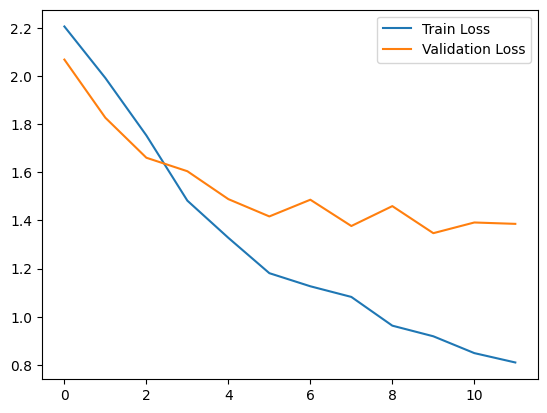

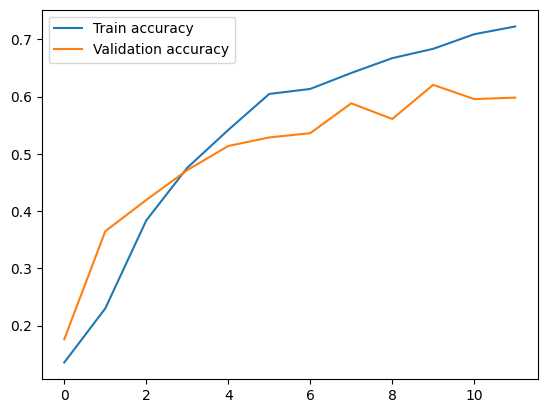

In [ ]:
plt.plot(history_new.history["loss"], label ="Train Loss")
plt.plot(history_new.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(history_new.history["accuracy"], label ="Train accuracy")
plt.plot(history_new.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()

In [ ]:
scores = model_new.evaluate(test_datagen)
scores

13/13 [==============================] - 10s 769ms/step - loss: 1.3729 - accuracy: 0.5806


[1.3729417324066162, 0.5806451439857483]

**Test Accuracy**

In [ ]:
print('Test loss:', scores[0]) 
print('Test accuracy:', scores[1])

Test loss: 1.3729417324066162
Test accuracy: 0.5806451439857483


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    print(predictions[0])

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 105ms/step
[0.07821774 0.07701091 0.00817289 0.14957549 0.01782884 0.23855537
 0.117935   0.3127038 ]
1/1 [==============================] - 0s 18ms/step
[4.2030476e-03 1.5485102e-03 2.0305757e-05 2.4003378e-04 9.9153817e-01
 2.2290372e-03 2.1613295e-04 4.8377537e-06]
1/1 [==============================] - 0s 18ms/step
[2.5468493e-02 4.2472795e-02 3.0563348e-03 3.8500477e-02 6.3697703e-04
 3.3869136e-02 5.1525556e-02 8.0447024e-01]
1/1 [==============================] - 0s 18ms/step
[0.40975702 0.03944602 0.04488164 0.02359564 0.02328167 0.04375315
 0.07763738 0.33764756]
1/1 [==============================] - 0s 23ms/step
[9.7511023e-01 1.4582924e-03 2.0123362e-03 8.5615920e-04 9.3133322e-06
 9.7868200e-05 1.8834345e-02 1.6214603e-03]
1/1 [==============================] - 0s 19ms/step
[2.2132268e-04 4.8601134e-03 9.6095711e-01 3.6482735e-08 6.5027224e-03
 2.6097344e-02 1.3609377e-03 4.7763933e-07]
1/1 [==============================] - 0s 20m

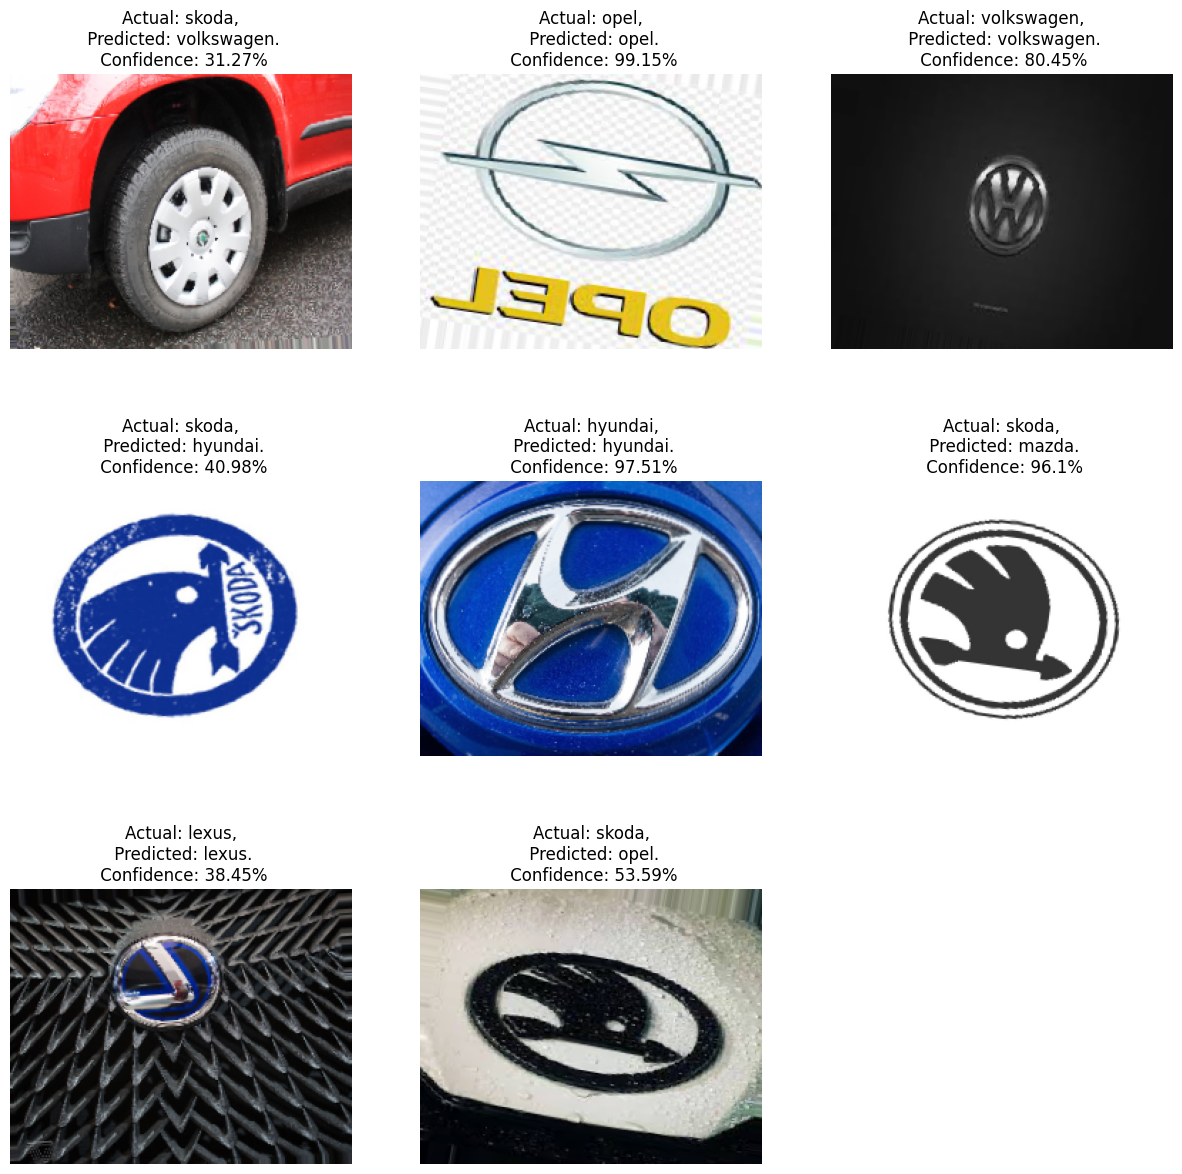

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_datagen:
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model_new, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

## VGG19

In [ ]:
from keras.applications import VGG19

vgg = VGG19(include_top= False, weights = "imagenet", input_shape=( img_height, img_width, 3))
vgg_layer_list = vgg.layers

model_vgg = Sequential ()

for layer in vgg_layer_list:
    model_vgg.add(layer)
    
for layer in model_vgg.layers:
    layer.trainable = False
    

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# model_vgg.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
# model_vgg.add(MaxPooling2D(pool_size=(2, 2)))

model_vgg.add(Flatten())
model_vgg.add(Dense(1024))
model_vgg.add(Activation('relu'))
model_vgg.add(Dropout(0.2))

model_vgg.add(Dense(512))
model_vgg.add(Activation('relu'))
model_vgg.add(Dropout(0.2))

model_vgg.add(Dense(8))
model_vgg.add(Activation('softmax'))
model_vgg.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 193, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 193, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 120, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 120, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 120, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 48, 60, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 48, 60, 256)      

In [ ]:
opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)

model_vgg.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

hist_vgg = model_vgg.fit_generator(
        generator=train_datagen,        
        epochs=12,
        validation_data=test_datagen)

Epoch 1/12
79/79 [==============================] - 72s 831ms/step - loss: 2.1945 - accuracy: 0.4258 - val_loss: 1.1006 - val_accuracy: 0.6576
Epoch 2/12
79/79 [==============================] - 59s 743ms/step - loss: 0.8612 - accuracy: 0.7151 - val_loss: 0.9843 - val_accuracy: 0.6849
Epoch 3/12
79/79 [==============================] - 59s 744ms/step - loss: 0.6987 - accuracy: 0.7636 - val_loss: 0.8854 - val_accuracy: 0.7320
Epoch 4/12
79/79 [==============================] - 61s 771ms/step - loss: 0.6109 - accuracy: 0.7931 - val_loss: 0.8243 - val_accuracy: 0.7519
Epoch 5/12
79/79 [==============================] - 59s 742ms/step - loss: 0.5212 - accuracy: 0.8329 - val_loss: 0.8533 - val_accuracy: 0.7395
Epoch 6/12
79/79 [==============================] - 59s 752ms/step - loss: 0.4993 - accuracy: 0.8293 - val_loss: 0.8201 - val_accuracy: 0.7568
Epoch 7/12
79/79 [==============================] - 58s 740ms/step - loss: 0.4000 - accuracy: 0.8607 - val_loss: 0.8440 - val_accuracy: 0.7667

**Model Evaluation VGG19**

In [ ]:
print(hist_vgg.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


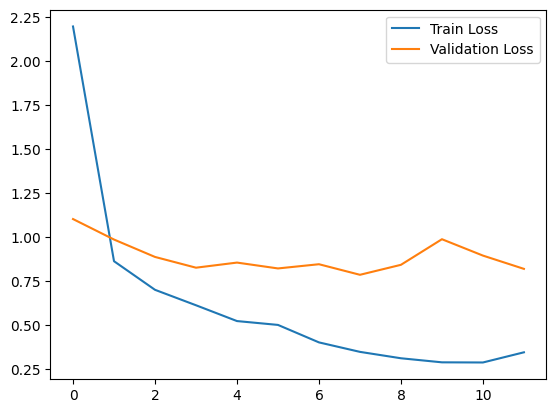

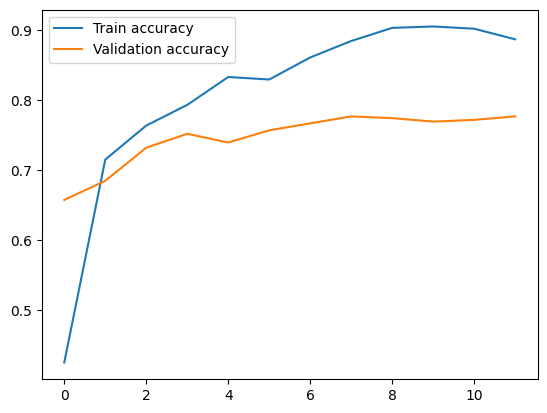

In [ ]:
plt.plot(hist_vgg.history["loss"], label ="Train Loss")
plt.plot(hist_vgg.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist_vgg.history["accuracy"], label ="Train accuracy")
plt.plot(hist_vgg.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()

In [ ]:
scores = model_new.evaluate(test_datagen)
scores

13/13 [==============================] - 9s 726ms/step - loss: 1.3270 - accuracy: 0.5757


[1.3270331621170044, 0.5756824016571045]

**VGG 19 Test Accuracy**

In [ ]:
print('Test loss:', scores[0]) 
print('Test accuracy:', scores[1])

Test loss: 1.3270331621170044
Test accuracy: 0.5756824016571045


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    print(predictions[0])

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 1s 718ms/step
[0.10357054 0.33809584 0.2958662  0.1467064  0.03126111 0.01329409
 0.02253952 0.04866631]
1/1 [==============================] - 0s 19ms/step
[1.7066846e-04 2.8820743e-05 3.3335604e-05 6.7423185e-05 3.1239185e-07
 5.7544658e-04 1.5204028e-03 9.9760360e-01]
1/1 [==============================] - 0s 18ms/step
[3.2325666e-02 3.0981654e-02 9.1574758e-01 1.8232901e-03 1.5242844e-02
 8.9625700e-04 2.5299338e-03 4.5272152e-04]
1/1 [==============================] - 0s 19ms/step
[6.9184385e-02 3.8121402e-02 8.8150716e-01 6.8435799e-03 1.6376886e-03
 1.4652724e-04 1.9273093e-03 6.3187198e-04]
1/1 [==============================] - 0s 20ms/step
[1.5832515e-02 1.1933597e-03 2.6244714e-04 1.8654819e-04 1.3780701e-01
 7.0085860e-04 8.4257257e-01 1.4446272e-03]
1/1 [==============================] - 0s 19ms/step
[1.3197987e-06 5.5200104e-08 1.8942013e-07 9.9998116e-01 1.0137310e-08
 4.0435648e-07 3.6408503e-06 1.3143882e-05]
1/1 [================

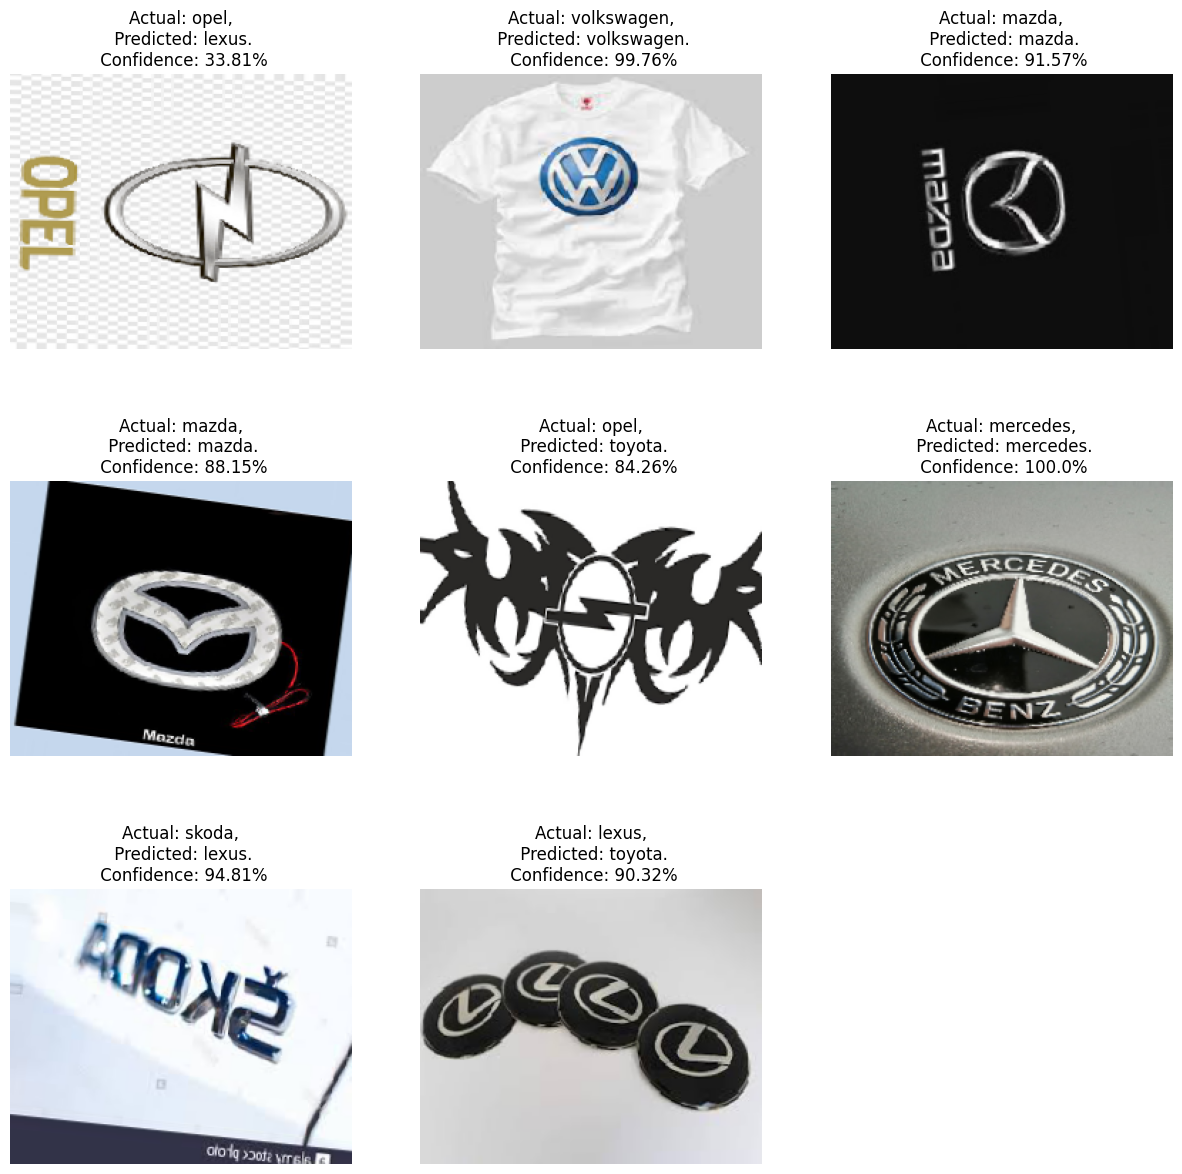

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_datagen:
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model_vgg, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

## ResNet50

In [ ]:
IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'
NUM_CLASSES = 8

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

# Using 1 to easily manage mapping between test_generator & prediction for submission preparation
BATCH_SIZE_TESTING = 1

#Still not talking about our train/test data or any pre-processing.

model_resNet50 = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
model_resNet50.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model_resNet50.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
# model.layers[0].trainable = False

In [ ]:
model_resNet50.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_2 (Dense)             (None, 8)                 16392     
                                                                 
Total params: 23,604,104
Trainable params: 23,550,984
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
from tensorflow.python.keras import optimizers

sgd = tf.keras.optimizers.legacy.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
# model_resNet50.compile(optimizer = sgd, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)
model_resNet50.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

In [ ]:
hist_resNet50 = model_resNet50.fit_generator(
        generator=train_datagen,        
        epochs=12,
        validation_data=test_datagen)

Epoch 1/12
79/79 [==============================] - 358s 4s/step - loss: 0.8812 - accuracy: 0.7310 - val_loss: 2.3239 - val_accuracy: 0.1241
Epoch 2/12
79/79 [==============================] - 66s 834ms/step - loss: 0.3693 - accuracy: 0.8814 - val_loss: 2.2655 - val_accuracy: 0.1241
Epoch 3/12
79/79 [==============================] - 66s 837ms/step - loss: 0.2449 - accuracy: 0.9172 - val_loss: 2.3139 - val_accuracy: 0.1266
Epoch 4/12
79/79 [==============================] - 66s 840ms/step - loss: 0.1901 - accuracy: 0.9387 - val_loss: 2.3657 - val_accuracy: 0.1241
Epoch 5/12
79/79 [==============================] - 65s 815ms/step - loss: 0.1151 - accuracy: 0.9642 - val_loss: 2.4353 - val_accuracy: 0.1464
Epoch 6/12
79/79 [==============================] - 66s 829ms/step - loss: 0.0825 - accuracy: 0.9733 - val_loss: 1.7300 - val_accuracy: 0.3747
Epoch 7/12
79/79 [==============================] - 66s 835ms/step - loss: 0.0888 - accuracy: 0.9702 - val_loss: 1.0117 - val_accuracy: 0.6749
E

**RESNET50 MODEL EVALUATION**

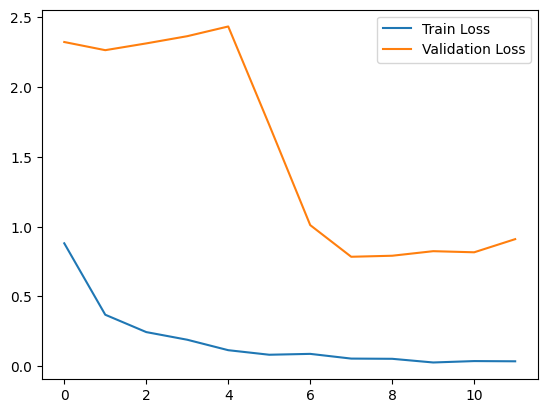

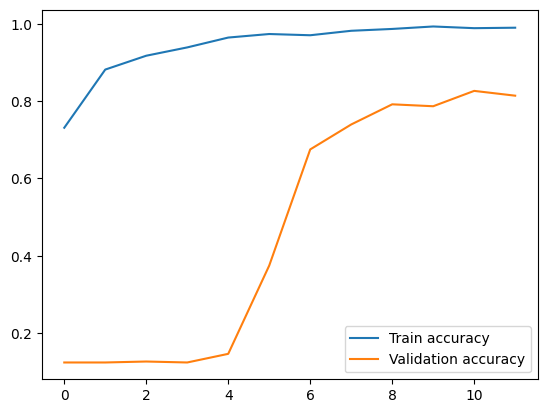

In [ ]:
plt.plot(hist_resNet50.history["loss"], label ="Train Loss")
plt.plot(hist_resNet50.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist_resNet50.history["accuracy"], label ="Train accuracy")
plt.plot(hist_resNet50.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()

In [ ]:
scores = model_resNet50.evaluate(test_datagen)
scores

13/13 [==============================] - 12s 778ms/step - loss: 0.8610 - accuracy: 0.8213


[0.8609970211982727, 0.8213399648666382]

**RESNET50 TEST ACCURACY**

In [ ]:
print('Test loss:', scores[0]) 
print('Test accuracy:', scores[1])

Test loss: 0.8609970211982727
Test accuracy: 0.8213399648666382


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    print(predictions[0])

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 1s 1s/step
[0.52127564 0.01110295 0.08493201 0.0063006  0.25598252 0.00451304
 0.11533979 0.00055345]
1/1 [==============================] - 0s 26ms/step
[5.4580698e-05 1.4137341e-07 1.5770487e-05 9.9989879e-01 2.5536434e-07
 1.6907261e-07 3.0256573e-05 9.2396562e-08]
1/1 [==============================] - 0s 23ms/step
[8.0680411e-04 7.8060367e-04 3.2198478e-03 6.7027373e-04 2.5449259e-02
 4.4488171e-04 9.6836960e-01 2.5864493e-04]
1/1 [==============================] - 0s 23ms/step
[4.2166057e-08 7.1603210e-07 8.7893104e-06 3.9589764e-07 2.2825297e-07
 7.3718280e-09 2.0055197e-07 9.9998963e-01]
1/1 [==============================] - 0s 23ms/step
[2.1502158e-14 1.0000000e+00 2.0536771e-10 2.1418629e-13 7.1322037e-12
 1.8558483e-14 3.3890904e-12 2.2976293e-13]
1/1 [==============================] - 0s 27ms/step
[1.4880836e-11 1.7144732e-11 5.4392450e-07 2.3124386e-10 9.9999940e-01
 3.3827194e-09 4.5501733e-10 2.5712671e-10]
1/1 [===================

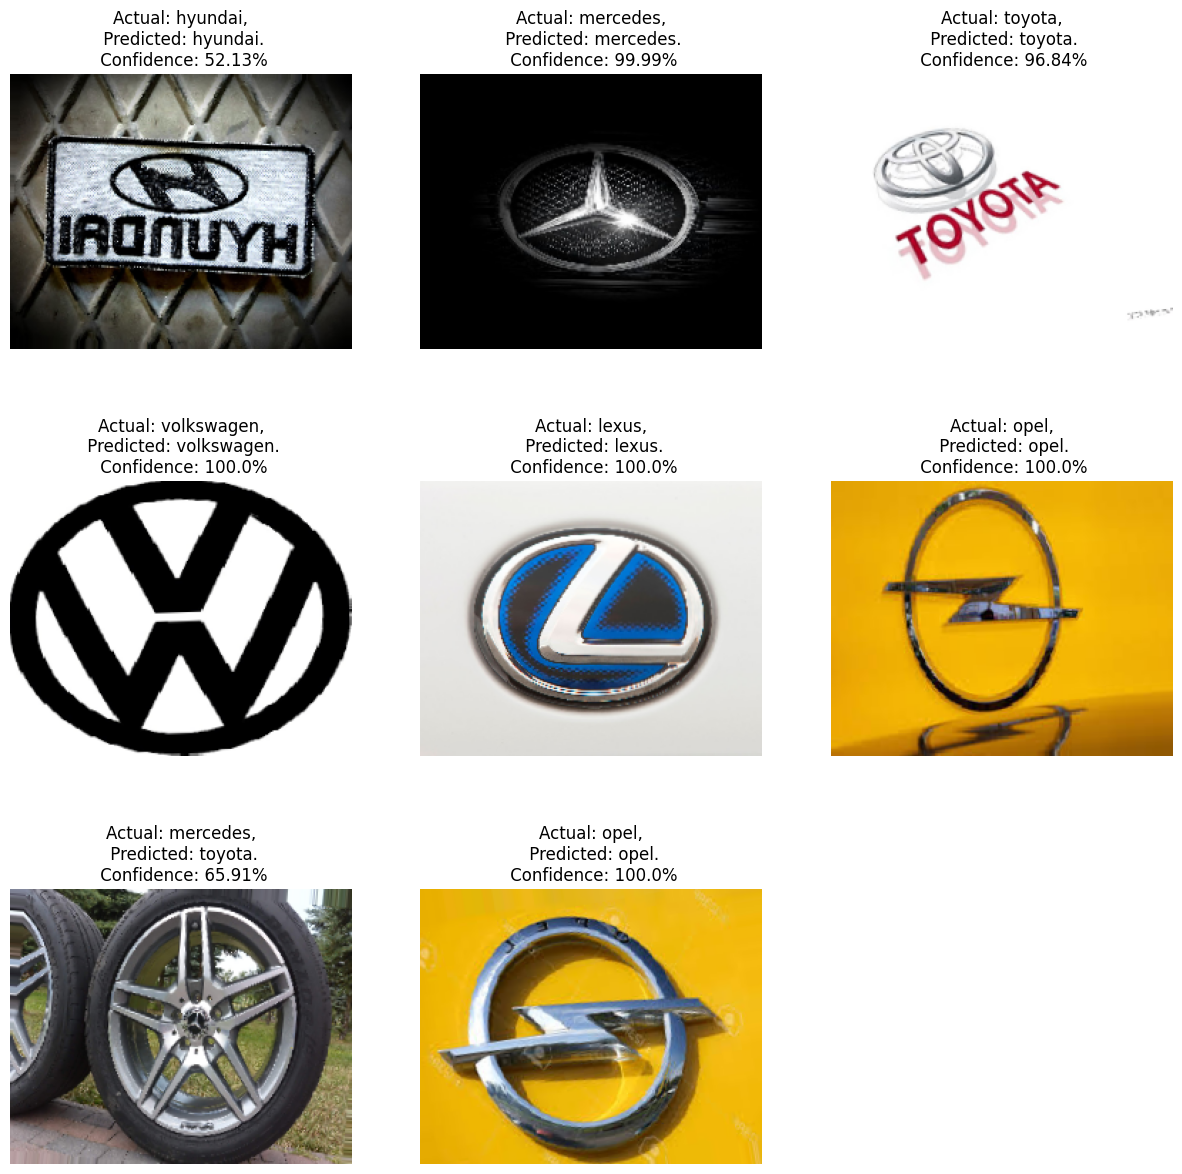

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in test_datagen:
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model_resNet50, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break


In [ ]:
!pip install tensorflow-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## MobileNet

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pylab as plt
import numpy as np
from keras.layers import Dense,GlobalAveragePooling2D

In [ ]:
# Pre-trained MobilenetV2

# mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
base_model = MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

In [ ]:
tensor = base_model.output
type(tensor)

keras.engine.keras_tensor.KerasTensor

In [ ]:
# To use the pre-trained MobilenetV2 layers

tensor = GlobalAveragePooling2D()(tensor)
tensor = Dense(1024,activation='relu')(tensor) #we add dense layers so that the model can learn more complex functions and classify for better results.
tensor = Dense(1024,activation='relu')(tensor) #dense layer 2
tensor = Dense(512,activation='relu')(tensor) #dense layer 3
preds = Dense(8,activation='softmax')(tensor) #final layer with softmax activation

In [ ]:
from keras.models import Model

model_mobileNet = Model(inputs=base_model.input,outputs=preds)

In [ ]:
# Lets check the model architecture

for i,layer in enumerate(model_mobileNet.layers):
    print(i,layer.name)

0 input_2
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [ ]:
# if we want to set the first 20 layers of the network to be non-trainable

for layer in model_mobileNet.layers[:20]:
    layer.trainable=False
for layer in model_mobileNet.layers[20:]:
    layer.trainable=True

In [ ]:
model_mobileNet.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# model_mobileNet.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
model_mobileNet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

## Data Generator for Mobile Net

In [ ]:
batch_mn = 32

from keras.applications.mobilenet import preprocess_input
# This model works best with only 224, 224 as the dimensions and doesn't accept the dimesnions calculated based on the avg. dimensions calculated earlier.

# Create a data augmentor
train_datagen_mn = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create datasets
train_set_mn = train_datagen_mn.flow_from_directory(train_path,
												target_size=(img_height, img_width),
												class_mode="categorical",
                                                 batch_size=batch_mn)

Found 2513 images belonging to 8 classes.


In [ ]:
test_datagen_mn = ImageDataGenerator(preprocessing_function=preprocess_input)

test_set_mn = test_datagen_mn.flow_from_directory(test_path,
												target_size=(img_height, img_width),
												class_mode="categorical",
                                               batch_size=batch_mn)

Found 403 images belonging to 8 classes.


In [ ]:
hist_mobileNet = model_mobileNet.fit_generator(
        generator=train_set_mn,        
        epochs=12,
        validation_data=test_set_mn)

Epoch 1/12
79/79 [==============================] - 52s 421ms/step - loss: 0.7401 - accuracy: 0.7640 - val_loss: 2.1725 - val_accuracy: 0.5608
Epoch 2/12
79/79 [==============================] - 32s 402ms/step - loss: 0.4105 - accuracy: 0.8723 - val_loss: 2.5140 - val_accuracy: 0.5608
Epoch 3/12
79/79 [==============================] - 32s 410ms/step - loss: 0.3941 - accuracy: 0.8842 - val_loss: 1.2602 - val_accuracy: 0.7494
Epoch 4/12
79/79 [==============================] - 36s 459ms/step - loss: 0.2978 - accuracy: 0.9105 - val_loss: 1.4360 - val_accuracy: 0.7072
Epoch 5/12
79/79 [==============================] - 32s 403ms/step - loss: 0.2187 - accuracy: 0.9264 - val_loss: 3.1606 - val_accuracy: 0.6898
Epoch 6/12
79/79 [==============================] - 36s 459ms/step - loss: 0.2197 - accuracy: 0.9395 - val_loss: 2.1063 - val_accuracy: 0.7022
Epoch 7/12
79/79 [==============================] - 31s 396ms/step - loss: 0.2165 - accuracy: 0.9379 - val_loss: 2.0834 - val_accuracy: 0.7097

**MODEL EVALUATION MOBILENET**

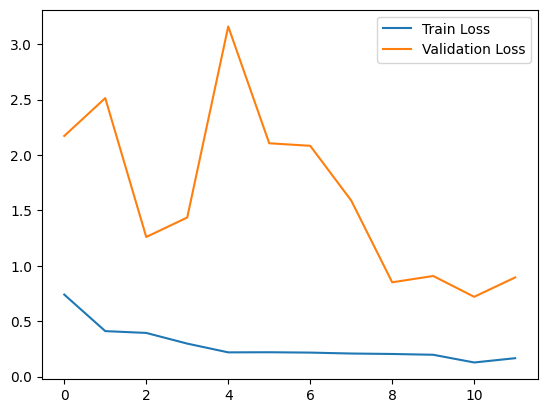

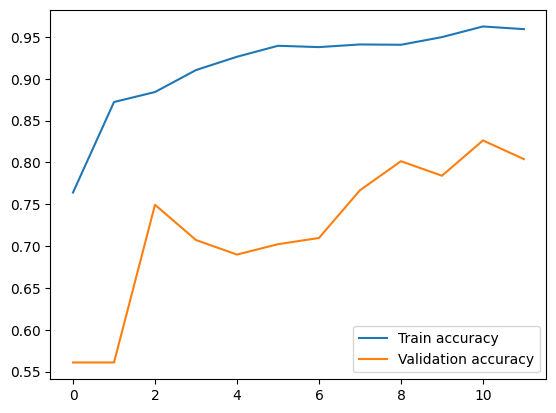

In [ ]:
plt.plot(hist_mobileNet.history["loss"], label ="Train Loss")
plt.plot(hist_mobileNet.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist_mobileNet.history["accuracy"], label ="Train accuracy")
plt.plot(hist_mobileNet.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()

In [ ]:
scores = model_mobileNet.evaluate(test_set_mn)
scores

13/13 [==============================] - 6s 414ms/step - loss: 0.8952 - accuracy: 0.8040


[0.8951881527900696, 0.803970217704773]

**MOBILENET TEST ACCURACY**

In [ ]:
print('Test loss:', scores[0]) 
print('Test accuracy:', scores[1])

Test loss: 0.8951881527900696
Test accuracy: 0.803970217704773


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    print(predictions[0])

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


[0.02263449 0.03168697 0.13414556 0.03623793 0.20735799 0.48616806
 0.05194068 0.02982835]
1/1 [==============================] - 0s 20ms/step
[1.9539995e-04 5.9270574e-04 6.8627659e-04 1.8704474e-03 9.9580449e-01
 7.1990435e-05 5.9104402e-04 1.8767304e-04]
1/1 [==============================] - 0s 23ms/step


[0.05607059 0.09688649 0.09875868 0.05809036 0.47733983 0.03554484
 0.03898549 0.13832365]
1/1 [==============================] - 0s 21ms/step


[4.9286881e-09 2.3033335e-09 1.0650166e-07 6.4143109e-08 1.6694275e-09
 3.2614203e-08 9.9999988e-01 5.3692661e-10]
1/1 [==============================] - 0s 20ms/step


[7.5515622e-04 1.2468126e-03 9.8556769e-01 3.8699317e-03 7.5531723e-03
 4.2974419e-04 2.9536014e-04 2.8202950e-04]
1/1 [==============================] - 0s 23ms/step


[1.7292493e-03 9.9710160e-01 7.7167402e-05 2.5417167e-04 6.6819036e-04
 5.0447702e-06 2.6765467e-05 1.3779686e-04]
1/1 [==============================] - 0s 22ms/step


[9.9682482e-03 9.8241699e-01 6.4658624e-04 2.2565029e-03 2.6698951e-03
 9.3929986e-05 6.1662216e-04 1.3312467e-03]
1/1 [==============================] - 0s 25ms/step
[7.4189288e-08 2.4220533e-08 1.5580671e-06 9.9999523e-01 2.4784455e-08
 1.1893760e-07 2.5924965e-06 3.1089743e-07]


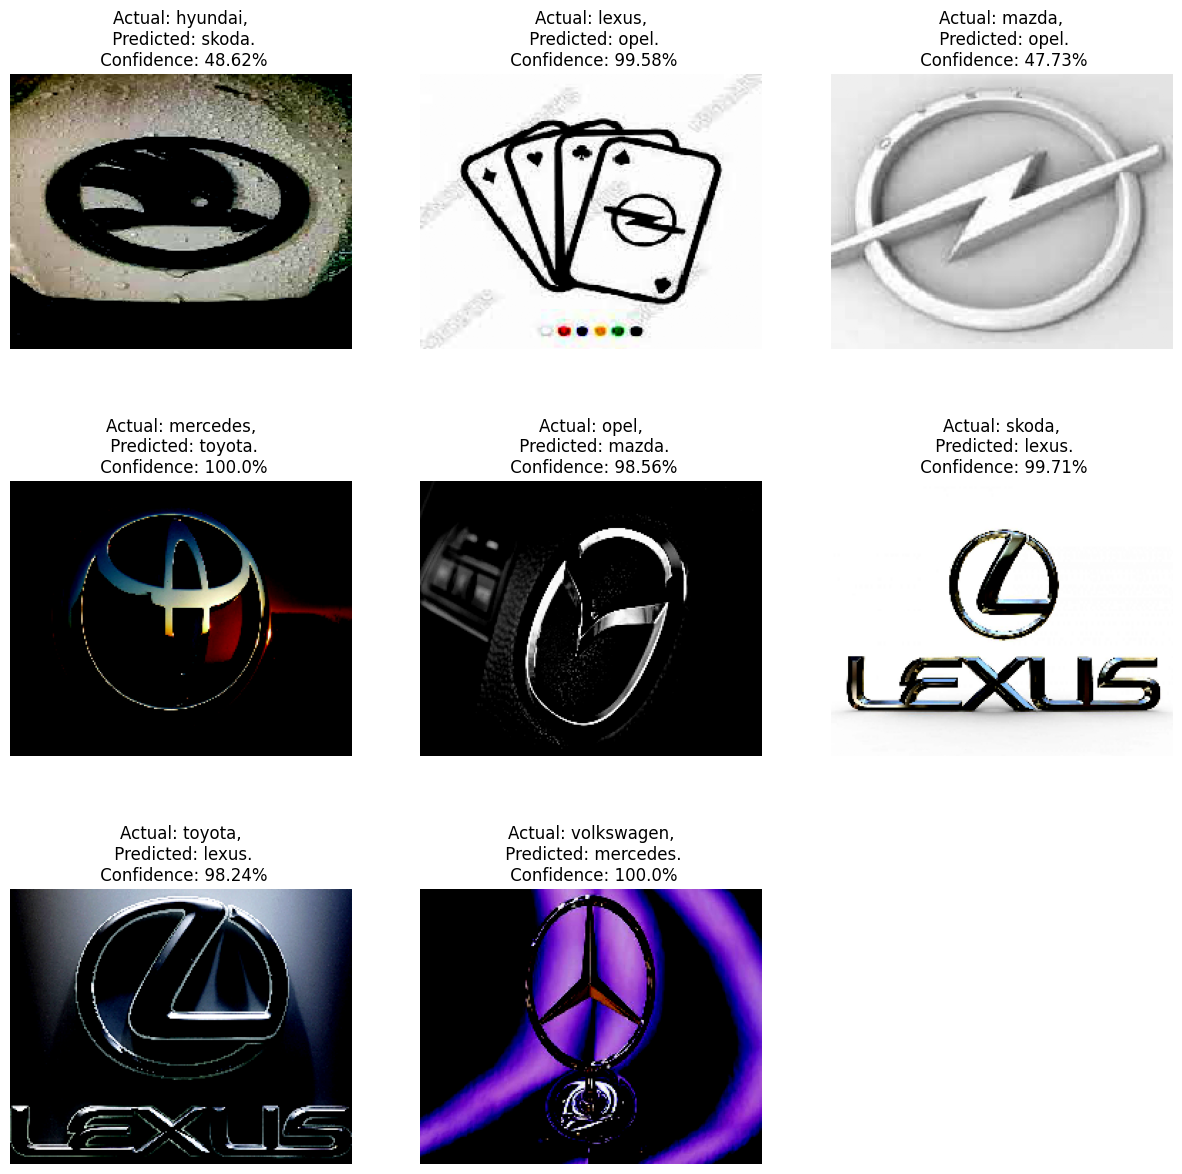

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 15))
for images, labels in test_set_mn:
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model_mobileNet, images[i])
        actual_class = class_names[i] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break